In [1]:
#%run 01_loading_model.ipynb
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('yeast_lyco_MVA.xml')

Renaming used metabolites

In [2]:
#for m in model.metabolites.query("diphosphate", 'name'):
  #  print(m, m.name)

In [3]:
model.reactions.r_0739.lower_bound = 0;
model.reactions.r_0739.upper_bound = 0

In [4]:
#model.reactions.get_by_id('r_0739')

In [5]:
#for m in model.metabolites.query("diphosphate", 'name'):
 #   print(m, m.name)

In [6]:
#model.metabolites.get_by_id('DMAPP')

In [7]:
#for m in model.metabolites.query("prenyl diphosphate", 'name'):
 #   print(m, m.name)

In [8]:
#model.metabolites.get_by_id('DMAPP')

In [9]:
#for m in model.metabolites.query("CTP", 'name'):
 #   print(m, m.name)

In [10]:
#model.metabolites.get_by_id('s_0539[c]')

In [11]:
#for m in model.metabolites.query("ATP", 'name'):
#    print(m, m.name)

In [12]:
#model.metabolites.get_by_id('s_0434[c]')

In [13]:
#for m in model.metabolites.query("CMP", 'name'):
 #   print(m, m.name)

In [14]:
#model.metabolites.get_by_id('s_0526[c]')

In [15]:
#for m in model.metabolites.query("diphosphate", 'name'):
#    print(m, m.name)

In [16]:
#model.metabolites.get_by_id('PPi_c')

In [17]:
#for m in model.metabolites.query("ADP", 'name'):
 #   print(m, m.name)

In [18]:
#model.metabolites.get_by_id('s_0394[c]')

In [19]:
pyruvate = model.metabolites.get_by_id('s_1399[c]')
pyruvate.id = "pyruvate_c"
ppi= model.metabolites.get_by_id('PPi_c')
ppi.id = "ppi_c"
g3p = model.metabolites.get_by_id('s_0764[c]')
g3p.id = "g3p_c"
ctp = model.metabolites.get_by_id('s_0539[c]')
ctp.id = "ctp_c"
atp = model.metabolites.get_by_id('s_0434[c]')
atp.id = "atp_c"
adp = atp = model.metabolites.get_by_id('s_0394[c]')
adp.id = "adp_c"
cmp = model.metabolites.get_by_id('s_0526[c]')
cmp.id = "cmp_c"
co2 = model.metabolites.get_by_id('s_0456[c]')
co2.id = "co2_c"
nadp = model.metabolites.get_by_id('s_1207[c]')
nadp.id = "nadp_c"
nadph = model.metabolites.get_by_id('s_1212[c]')
nadph.id = "nadph_c"
h = model.metabolites.get_by_id('s_0794[c]')
h.id = "h_c"
h2o = model.metabolites.get_by_id('H2O_c')
h2o.id = "h2o_c"
dmapp = model.metabolites.get_by_id('DMAPP')
dmapp.id = "dmapp_c"
ipp = model.metabolites.get_by_id('IPP')
ipp.id = "ipp_c"

New metabolites

In [20]:
dxp = Metabolite(id='dxp', compartment = 'c', name='1-Deoxy-D-xylulose 5-phosphate', formula = 'C5H11O7P')
mep = Metabolite(id='mep', compartment = 'c', name='2-C-Methyl-D-erythritol 4-phosphate', formula='C5H13O7P')
dme = Metabolite(id='dme', compartment = 'c', name='4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H23N3O14P2')
pdme = Metabolite(id='pdme', compartment = 'c', name='2-phospho-4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H22N3O17P3')
mec = Metabolite(id='mec', compartment = 'c', name='2-C-methyl-D-erythritol 2,4-cyclodiphosphate', formula='C5H10O9P2')
hmbd = Metabolite(id='hmbd', compartment = 'c', name='1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate', formula='C5H9O8P2')
#bacterial metabolites (needed for last two reactions). But research indicates that their activities are dependent on becoming reduced by NADPH
#fldr = Metabolite(id='fldr', compartment = 'c', name='reduced_flavodoxin', formula='C17H21N4O9P')
#fld = Metabolite(id='fmn', compartment = 'c', name='oxidized_flavodoxin', formula='C17H19N4O9P')

Bacterial metabolites (needed for last two reactions):
Flavodoxins are electron carriers. Their activity is dependent on becoming reduced by NADPH. Flavodoxins are proteins that are directly transcribed and translated. One caveat from this simulation is that the energy and resources required to generate the flavodoxins is not accounted for. Despite this, the MEP pathway stoichiometry remains the same. We are just skipping the step when the electrons are transferred from NADPH to the flavodoxins.

Introducing MEP pathway reactions

In [21]:
dxp_synthase = Reaction('Ec-dxs')
dx_reductoisomerase = Reaction('dxr')
cytidyltransferase = Reaction('ispD')
cm_kinase = Reaction('ispE')
mec_synthase = Reaction('ispF')
hmbpp_synthase = Reaction('ispG')
hmbpp_reductase1 = Reaction('ispH1')
hmbpp_reductase2 = Reaction('ispH2')

In [22]:
dxp_synthase.add_metabolites(({pyruvate: -1,
                             g3p: -1,
                             h: -1,
                             dxp: 1,
                             co2: 1
                             }))

In [23]:
dx_reductoisomerase.add_metabolites(({dxp: -1,
                               nadph: -1,
                               h: -1,
                               mep: 1,
                               nadp: 1
                              }))

In [24]:
cytidyltransferase.add_metabolites(({mep: -1,
                                     ctp: -1,
                                     h: -1,
                                    dme: 1,
                                    ppi: 1
                                   }))

In [25]:
cm_kinase.add_metabolites(({dme: -1,
                            atp: -1,
                            h: 1,
                            pdme: 1,
                            adp: 1
                            }))

In [26]:
mec_synthase.add_metabolites(({pdme: -1,
                               cmp: 1,
                               mec: 1
                                   }))

In [27]:
hmbpp_synthase.add_metabolites(({mec: -1,
                             h: -1,
                             nadph: -2,
                             h2o: 1,
                             nadp: 2,
                             hmbd: 1
                             }))

In [28]:
hmbpp_reductase1.add_metabolites(({hmbd: -1,
                             nadph: -2,
                             h: -2,
                             h2o: 1,
                             dmapp: 1,
                             nadp: 2
                             }))

In [29]:
hmbpp_reductase2.add_metabolites(({hmbd: -1,
                             nadph: -2,
                             h: -2,
                             h2o: 1,
                             ipp: 1,
                             nadp: 2
                             }))

Updating model with boundaries for introduced reactions

In [30]:
model.add_reactions([dxp_synthase])
model.add_reactions([dx_reductoisomerase])
model.add_reactions([cytidyltransferase])
model.add_reactions([cm_kinase])
model.add_reactions([mec_synthase])
model.add_reactions([hmbpp_synthase])
model.add_reactions([hmbpp_reductase1])
model.add_reactions([hmbpp_reductase2])

In [31]:
#model.reactions.

In [32]:
#with model:
   # model.objective = model.reactions.dxp_synthase
   # print(model.optimize().objective_value)

In [33]:
#model.add_boundary(model.metabolites.dxp, type = 'sink');
#model.add_boundary(model.metabolites.mep, type = 'sink');
#model.add_boundary(model.metabolites.dme, type = 'sink');
#model.add_boundary(model.metabolites.pdme, type = 'sink');
#model.add_boundary(model.metabolites.mec, type = 'sink');
#model.add_boundary(model.metabolites.hmbd, type = 'sink');
#model.add_boundary(model.metabolites.lycopene, type = 'demand');

In [34]:
#from cobra.io import write_sbml_model
#write_sbml_model(model,'yeast_lyco2.xml')

In [35]:
#model = read_sbml_model('yeast_lyco2.xml')

In [36]:
#model.reactions.r_0163.lower_bound = -500;
#model.reactions.r_0163.upper_bound = 1000

In [37]:
#model.reactions.r_2116.lower_bound = -500;
#model.reactions.r_2116.upper_bound = 1000

In [38]:
#model.reactions.r_1635.lower_bound = -500;
#model.reactions.r_1635.upper_bound = 1000

In [39]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 1000
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 1.0:
Maximum theoretical productivity of lycopene = 0.22569028345031686 mmol/(gDW*h^-1)
Maximum theoretical yield = 0.22569028345031686 mmol-lyco/mmol-glc

At glucose concentration = 1000:
Maximum theoretical productivity of lycopene = 58.31813725490194 mmol/(gDW*h*^-1)
Maximum theoretical yield = 0.1140916576946585 mmol-lyco/mmol-glc



In [40]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [41]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [42]:
medium = model.medium

#Amping glucose levels to 1000.0
medium['r_1714'] = 1000
model.reactions.r_1714.bounds = -1000.0, 1000

In [43]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,15.479327,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,16.146239,0.0,0.0,-947.370216
2,r_1714,0.0,0.0,0.0,16.813150,0.0,0.0,-894.740432
3,r_1714,0.0,0.0,0.0,17.480062,0.0,0.0,-842.110648
4,r_1714,0.0,0.0,0.0,18.146191,0.0,0.0,-789.480864
5,r_1714,0.0,0.0,0.0,18.808736,0.0,0.0,-736.851080
6,r_1714,0.0,0.0,0.0,19.471282,0.0,0.0,-684.221296
7,r_1714,0.0,0.0,0.0,20.133828,0.0,0.0,-631.591512
8,r_1714,0.0,0.0,0.0,20.709477,0.0,0.0,-578.961728
9,r_1714,0.0,0.0,0.0,19.765390,0.0,0.0,-526.331944


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

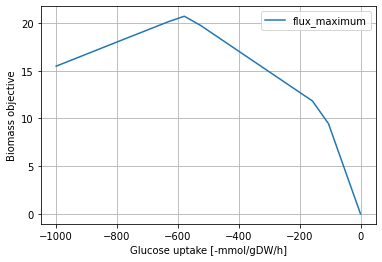

In [44]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

In [45]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,NaN,53.942991,1.330594e+00,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,55.362760,1.441479e+00,NaN,-947.370216
2,r_1714,0.0,0.0,NaN,55.922709,1.541706e+00,NaN,-894.740432
3,r_1714,0.0,0.0,NaN,56.461580,1.653843e+00,NaN,-842.110648
4,r_1714,0.0,0.0,NaN,57.000452,1.780931e+00,NaN,-789.480864
5,r_1714,0.0,0.0,NaN,57.539323,1.926174e+00,NaN,-736.851080
6,r_1714,0.0,0.0,NaN,58.078195,2.093760e+00,NaN,-684.221296
7,r_1714,0.0,0.0,NaN,58.318137,2.277602e+00,NaN,-631.591512
8,r_1714,0.0,0.0,NaN,58.318137,2.484644e+00,NaN,-578.961728
9,r_1714,0.0,0.0,NaN,58.318137,2.733093e+00,NaN,-526.331944


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

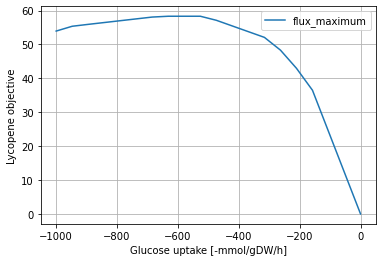

In [46]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

In [47]:
from cobra.io import write_sbml_model
write_sbml_model(model,"MEP_only.xml")